# Obesity Levels Estimation Based On Eating Habits and Physical Condition

## Project Topic
This project is about clustering on eating habits and physical condition.
### Type of Learning and Task
This project will focus on **Unsupervised Learning**, specifically a **Clustering** task.

### Algorithm
Clustering algorithms will be used to group individuals based on their eating habits and physical condition.
 - K-Means
 - Hierarchical Clustering
 - EM Expectation-Maximization

Compare unsupervised algorithm with supervised one.

#### Evaluation Metric:
- Adjusted Rand Index (ARI)
- Hierarchical Clustering Mutual Information Score (MIS)
- Accuracy from optimal mapping

### Goal and Motivation
The goal of this project is to identify distinct groups or patterns of individuals based on their eating habits and physical condition. This is motivated by the potential to gain insights into different lifestyle profiles related to obesity and to inform targeted interventions or public health strategies.

## Data
### Data Source
Estimation of Obesity Levels Based On Eating Habits and Physical Condition  [Dataset]. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.
### Brief Explanation
> This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform. -- UC Irvine Machine Learning Repository



#### Load Data

In [62]:
!pip install ucimlrepo -q

In [63]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [64]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


### Data Description

In [65]:
print("Number of rows:", X.shape[0])
print("Number of columns:", X.shape[1])
print("\nData size:", X.size)
print("\nData types:\n", X.dtypes)

Number of rows: 2111
Number of columns: 16

Data size: 33776

Data types:
 Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object


In [66]:
print("Number of distinct obesity levels:", y['NObeyesdad'].nunique())
print("Distinct obesity levels:", y['NObeyesdad'].unique())

Number of distinct obesity levels: 7
Distinct obesity levels: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


## Identify an Unsupervised Learning Problem

Based on the dataset containing a mix of numerical (e.g., Age, Height, Weight) and categorical (e.g., Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS) features, a suitable unsupervised learning problem is **Clustering**.

Clustering aims to group data points (individuals in this case) such that points in the same group (cluster) are more similar to each other than to those in other groups. This aligns with the project's goal of identifying distinct groups or patterns of individuals based on their eating habits and physical condition.

To apply clustering algorithms that typically work with numerical data, the categorical features will need to be appropriately encoded or transformed.

## Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

Before applying clustering algorithms, it's crucial to explore the data to understand its characteristics. This includes:

- Checking for missing values. Although the meta data states no missing value, I double checked it.
- Analyzing the distribution of features (numerical and categorical).
- Identifying potential outliers.
- Correlation Check. Visualizing relationships between features.
- Determine if any data needs to be transformed.

### Checking Missing Value
Conclusion: No missing value.

In [67]:
print("Missing values per column:\n", X.isnull().sum())

Missing values per column:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64


### Analyze the distribution of numerical features

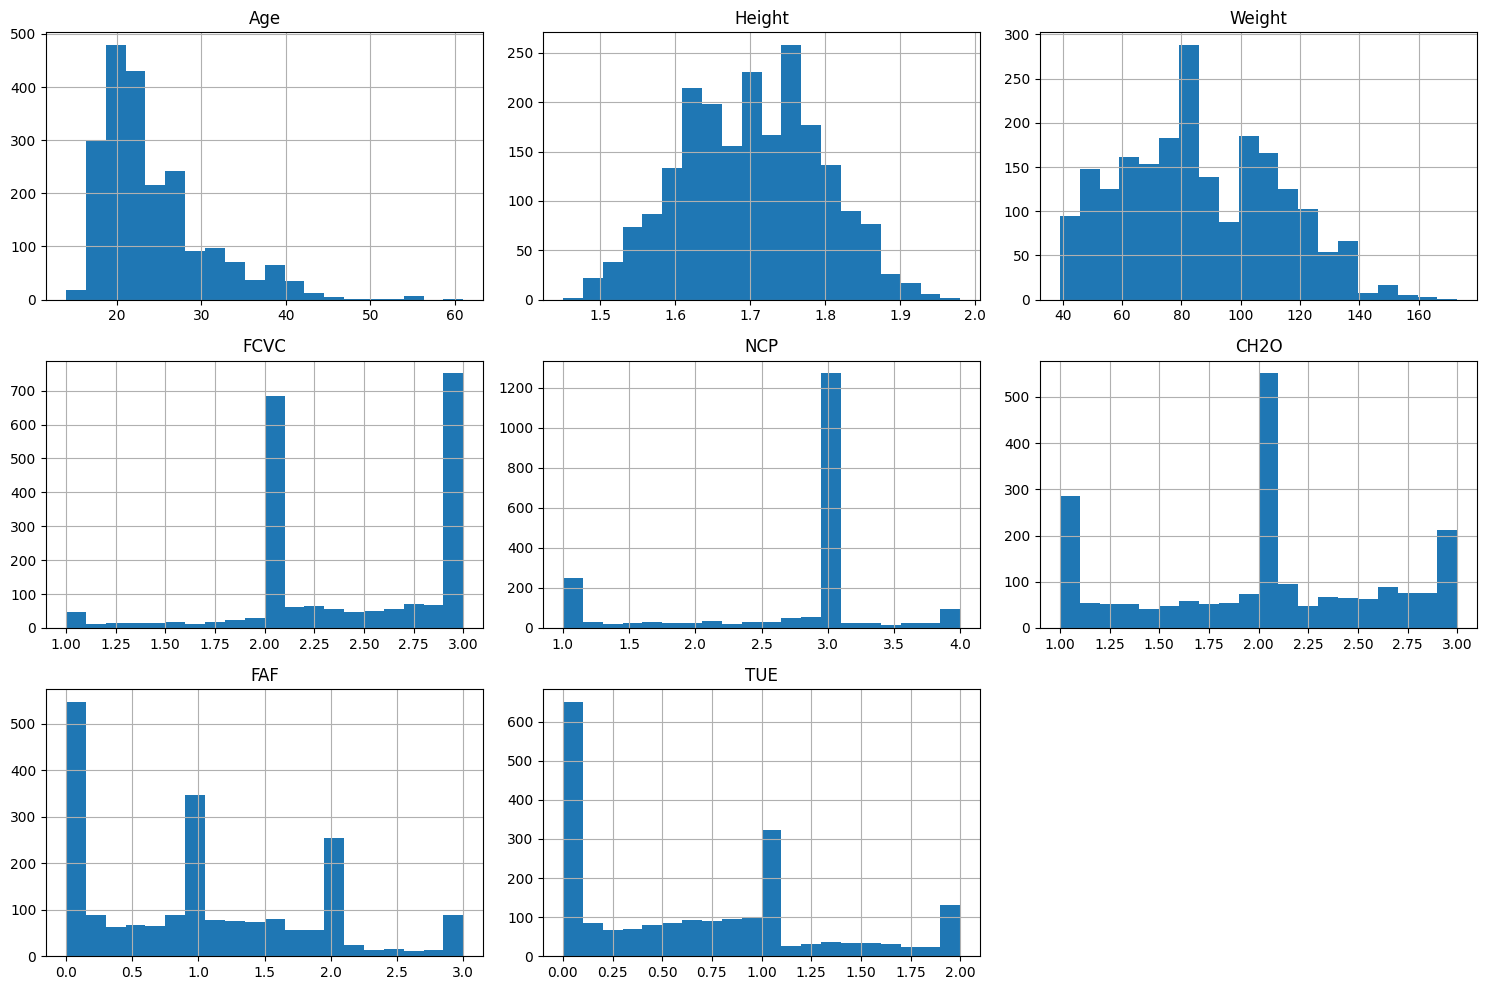

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical features
X[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Analyze the distribution of categorical features

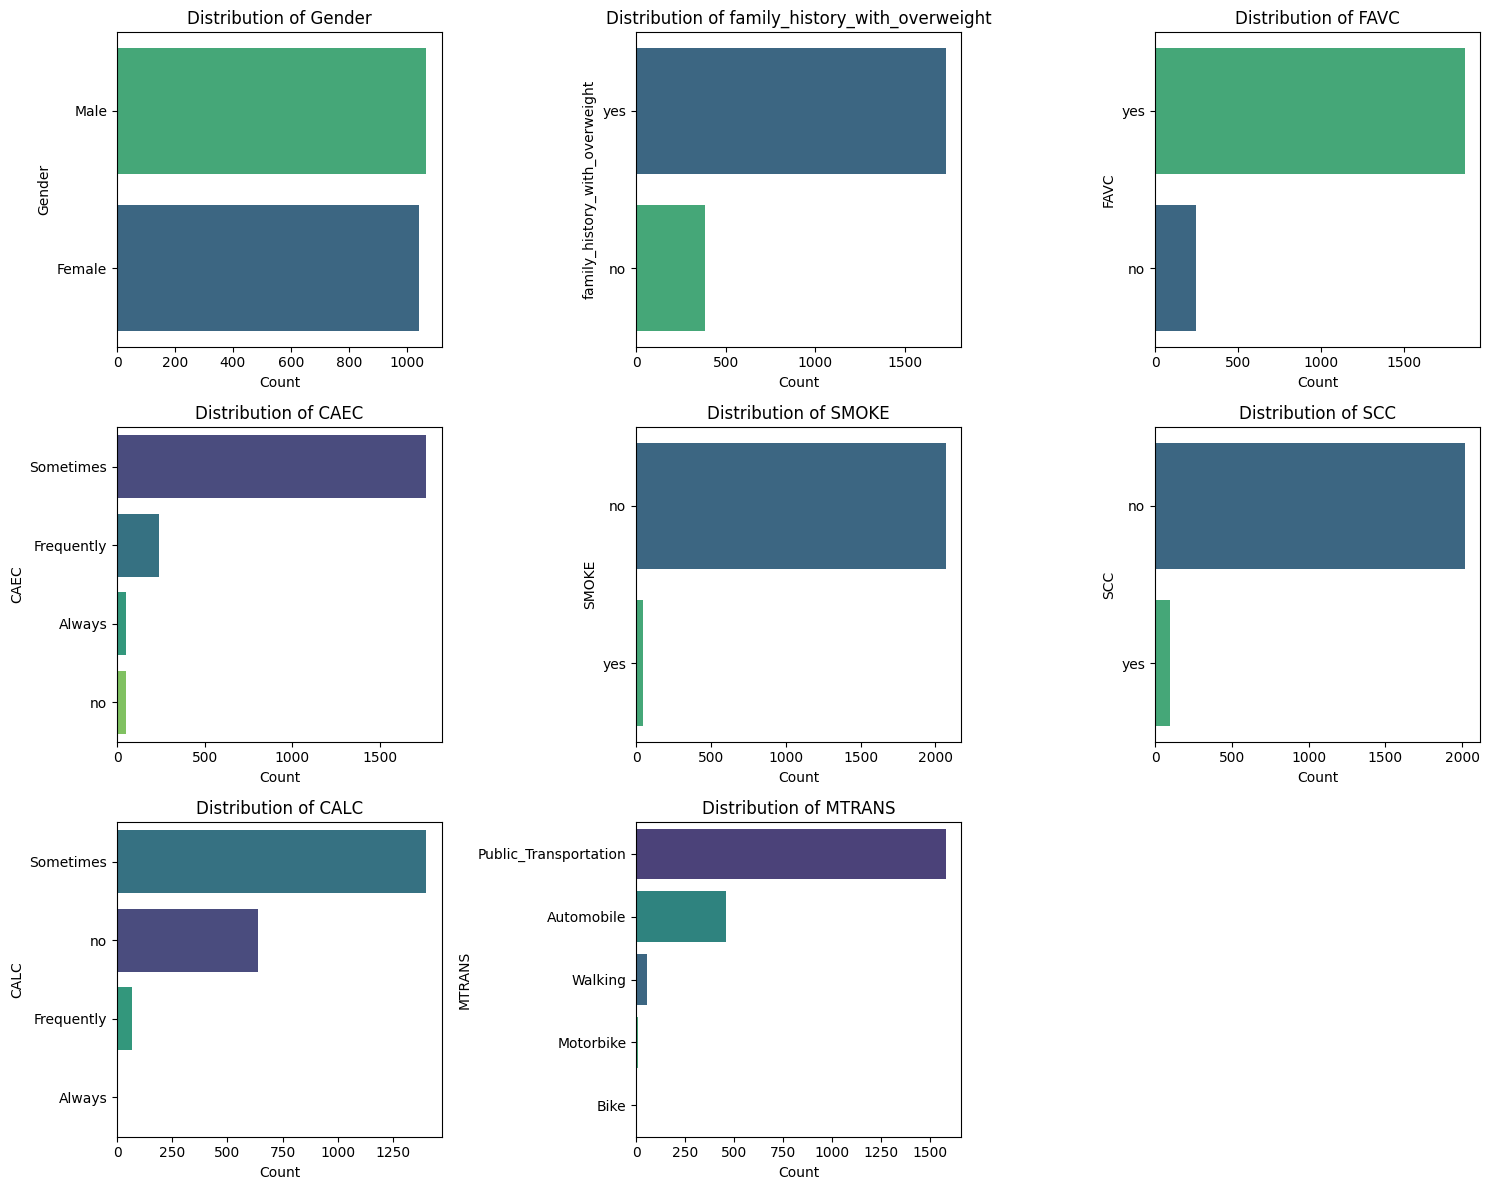

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Calculate the number of rows and columns for subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot count plots for categorical features
for i, col in enumerate(categorical_cols):
    sns.countplot(data=X, y=col, order=X[col].value_counts().index, palette='viridis', ax=axes[i], hue=col, legend=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Identify Potential Outliers

Conclusion: Not much outliers found. The age variable has long tail distribution causing the outliers above the whisker. But this is not an issue, as age might be highly correlated with obesity. No outlier needs to be removed.

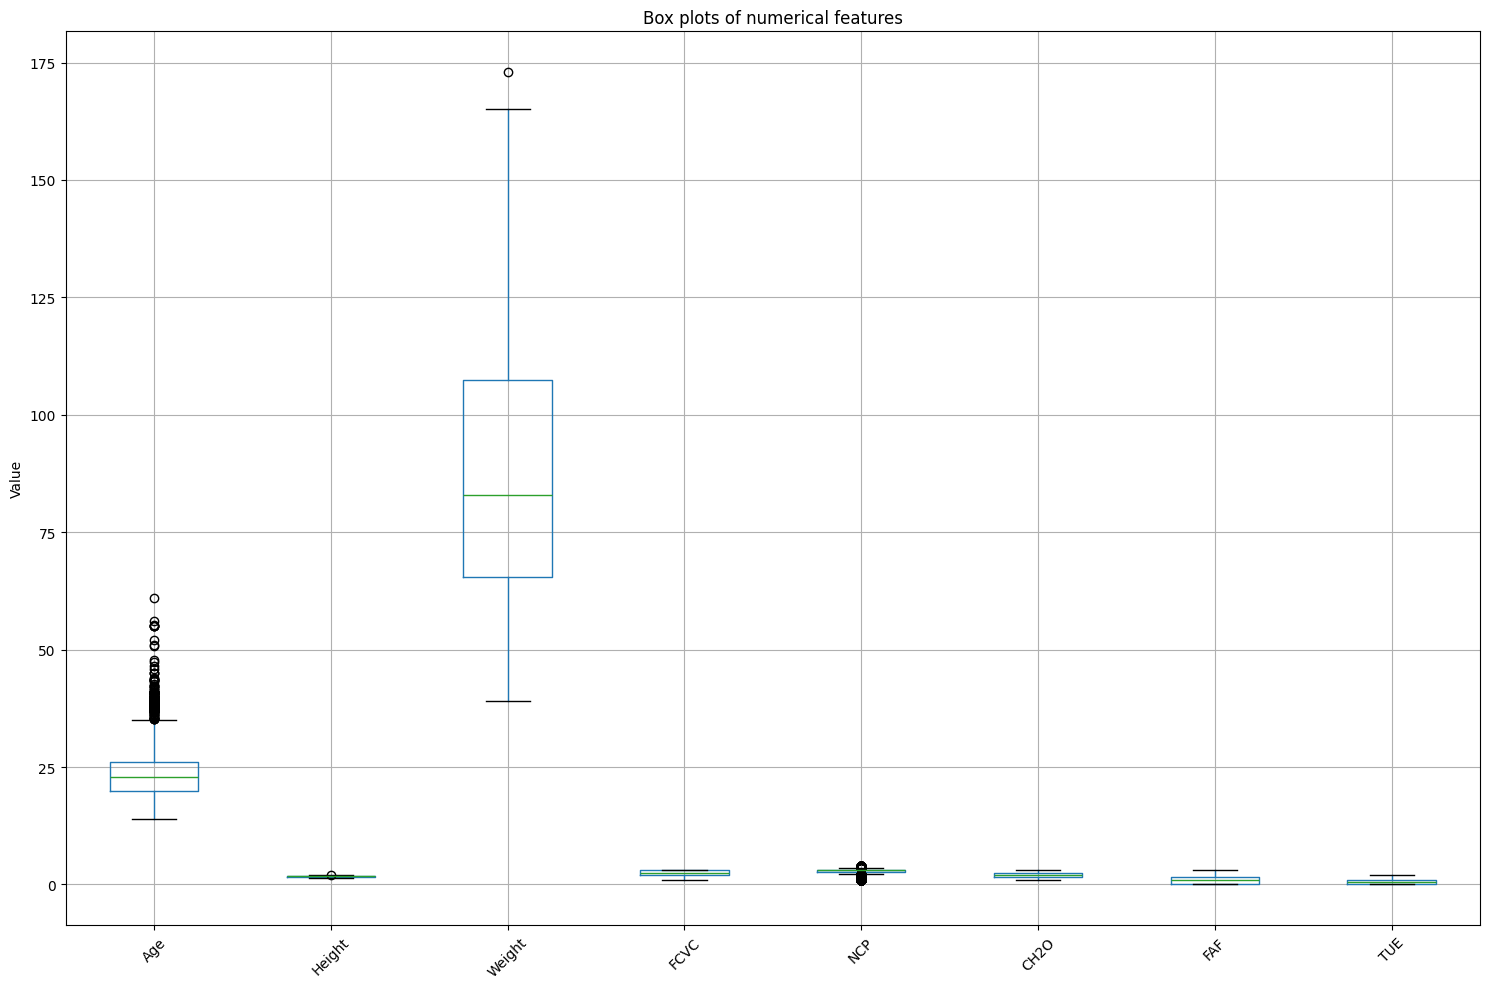

In [70]:
# Select numerical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for numerical features
plt.figure(figsize=(15, 10))
X[numerical_cols].boxplot()
plt.title('Box plots of numerical features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation Check
Conclusion: Height and weight are highly correlated. Others are not.

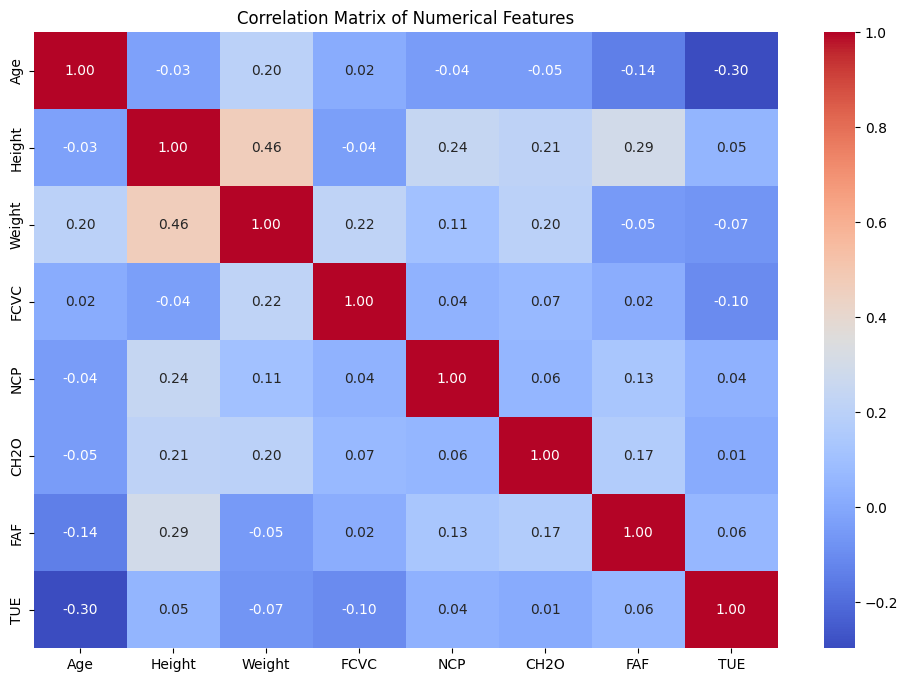

In [71]:
# Select numerical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = X[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Data Transformation
- Encode Categorical Data
  - Encode binary variables as 1 and 0 (e.g. female as 0 male as 1; no as 0 yes as 1)
  - Encode CAEC/CALC: no 0 , Sometimes 1, Frequently 2, Always 3
  - MTRANS: Automobile 1, Motorbike 2, Public_Transportation 3, Bike 4, Walking 5
- Normalize Numeric Data


In [72]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [73]:
for col in categorical_cols:
    print(f"Unique values for {col}: {X[col].unique()}")

Unique values for Gender: ['Female' 'Male']
Unique values for family_history_with_overweight: ['yes' 'no']
Unique values for FAVC: ['no' 'yes']
Unique values for CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
Unique values for SMOKE: ['no' 'yes']
Unique values for SCC: ['no' 'yes']
Unique values for CALC: ['no' 'Sometimes' 'Frequently' 'Always']
Unique values for MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Select numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include='object').columns

# Create a copy of the DataFrame to avoid modifying the original
X_encoded = X.copy()

# Manual encoding for specific categorical columns
binary_mapping = {'Female': 0, 'Male': 1, 'no': 0, 'yes': 1}
caec_calc_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
mtrans_mapping = {'Automobile': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Bike': 4, 'Walking': 5}

X_encoded['Gender'] = X_encoded['Gender'].map(binary_mapping)
X_encoded['family_history_with_overweight'] = X_encoded['family_history_with_overweight'].map(binary_mapping)
X_encoded['FAVC'] = X_encoded['FAVC'].map(binary_mapping)
X_encoded['SMOKE'] = X_encoded['SMOKE'].map(binary_mapping)
X_encoded['SCC'] = X_encoded['SCC'].map(binary_mapping)
X_encoded['CAEC'] = X_encoded['CAEC'].map(caec_calc_mapping)
X_encoded['CALC'] = X_encoded['CALC'].map(caec_calc_mapping)
X_encoded['MTRANS'] = X_encoded['MTRANS'].map(mtrans_mapping)


# Select numerical columns for scaling (all columns are now numerical after manual encoding)
all_cols_after_encoding = X_encoded.columns

# Create a ColumnTransformer for scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), all_cols_after_encoding)
    ])


# Transform the data
X_transformed = preprocessor.fit_transform(X_encoded)

# Convert the transformed data back to a DataFrame for easier inspection
X_transformed_df = pd.DataFrame(X_transformed, columns=all_cols_after_encoding)

display(X_transformed_df.head())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,-1.419172,0.417884
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,-0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,0.521160,0.417884
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,2.461491,0.417884
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,2.461491,2.606850
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,-0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,0.521160,0.417884


### PCA analysis


Explained variance ratio by each component: [0.16292543 0.11764598 0.0923233  0.08444813 0.07029127 0.06660655
 0.06145252 0.05471622 0.05135887 0.04923358 0.04743039 0.04244951
 0.03763982 0.02545411 0.02197541 0.01404889]
Cumulative explained variance: [0.16292543 0.28057141 0.37289472 0.45734285 0.52763412 0.59424067
 0.6556932  0.71040942 0.76176829 0.81100186 0.85843225 0.90088177
 0.93852159 0.9639757  0.98595111 1.        ]


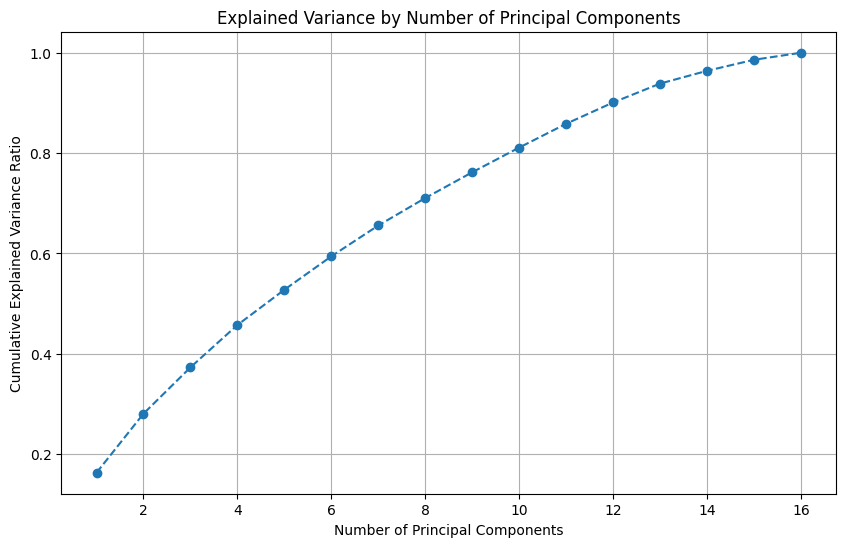


Number of components to explain 95% variance: 14
Shape of reduced PCA data: (2111, 14)


In [75]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_transformed)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio by each component:", explained_variance_ratio)

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative explained variance:", cumulative_explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# keep components that explain 95% of the variance:
n_components = next(i for i, cumulative_variance in enumerate(cumulative_explained_variance) if cumulative_variance >= 0.95) + 1
pca95 = PCA(n_components=n_components)
X_pca_reduced = pca95.fit_transform(X_transformed)
print(f"\nNumber of components to explain 95% variance: {n_components}")
print("Shape of reduced PCA data:", X_pca_reduced.shape)

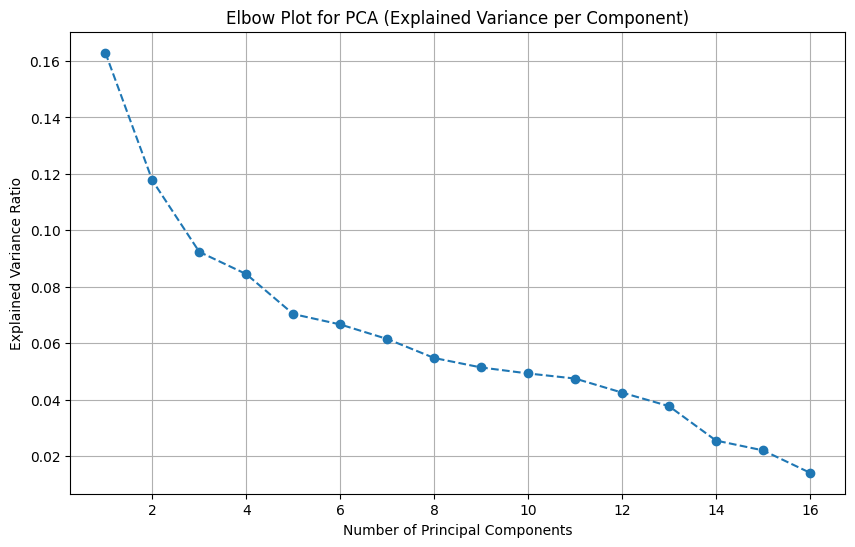

In [76]:
# Plot the elbow plot for explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Elbow Plot for PCA (Explained Variance per Component)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

#### Conclusion
As only two variables drops if I set the number of variables explain 95% variance, I will keep all features for the following unsupervised learning. Besides last few variables isn't flattened by the elbow chart.


## Models: Clustering Algorithm

Apply and compare clustering algorithms
 - K-Means
 - Hierarchical Clustering
 - EM

Evaluation Metrics
- Adjusted Rand Index (ARI)
  - ARI evaluates pairwise agreement between the clustering and the ground-truth labels.
- Mutual Information Score (MIS)
  - Mutual Information (MI) measures shared information between cluster labels and ground-truth labels.

### Number of Clusters Based on Data
Although the data has already defined 7 categories for obesity levels, it's interesting to check the number of clusters by data itself.

- Elbow Method: Look for the "elbow point" in the plot of inertia vs. the number of clusters (k). This is where the decrease in inertia slows down, suggesting a good balance between the number of clusters and within-cluster variation.
- Silhouette Score: Aim for the highest silhouette score, which measures how similar a data point is to its own cluster compared to others. A higher score indicates better-defined clusters.

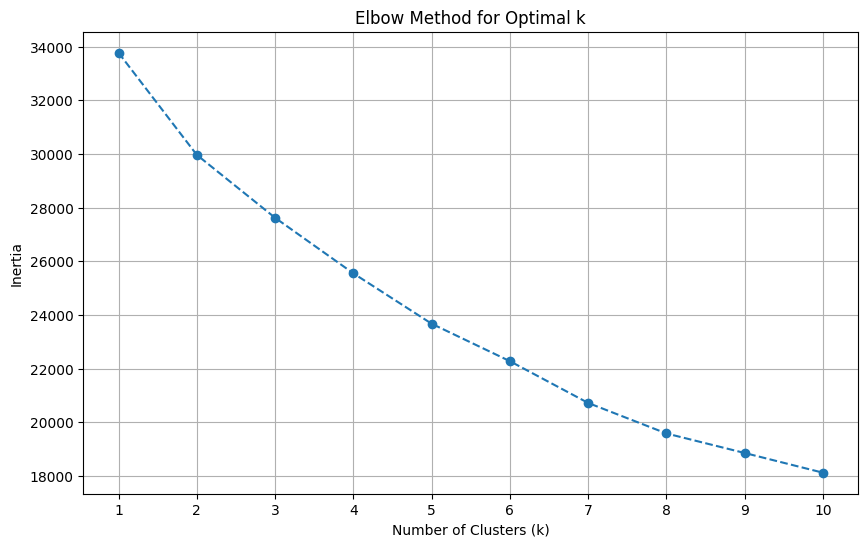

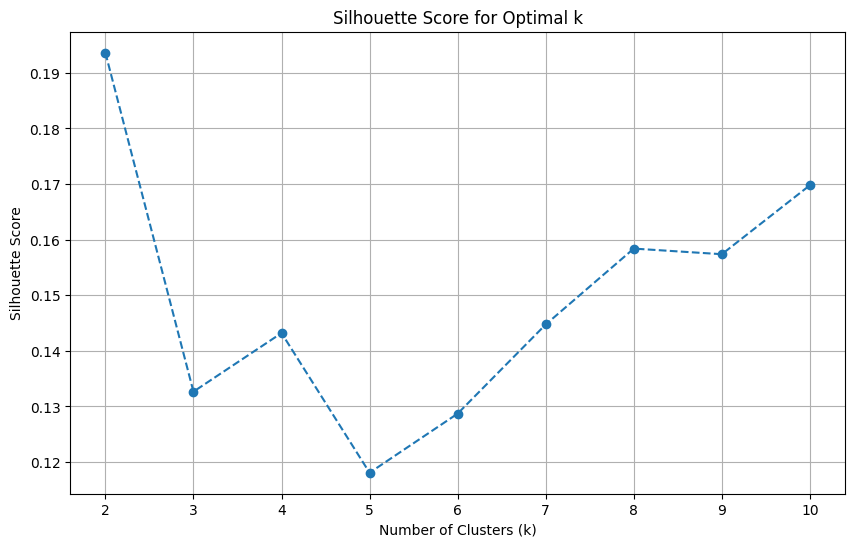

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the elbow method and silhouette score

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_transformed_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11): # Trying k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_transformed_df)
    score = silhouette_score(X_transformed_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

By elbow chart, the degree of inertia decrease slows after k = 7
By Sihouette Score, K = 2 has the highest scores, giving the best cluster seperation. Probably, determing whether obesity exists is much easier than measuring the level of obesity.

### Choose The Number of Clusters K = 7

As original data has already set 7 levels of obesity, I will also set the number of clusters k = 7 so that I can evalute the model performance by comparing the prediction with the original one.

### K-Means


In [78]:
# Apply K-Means with the chosen number of clusters (k=7)
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
kmeans.fit(X_transformed_df)
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame
X_with_clusters = X.copy()
X_with_clusters['KMeans_Cluster'] = cluster_labels

display(X_with_clusters.head())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,KMeans_Cluster
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,5
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,2
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,5


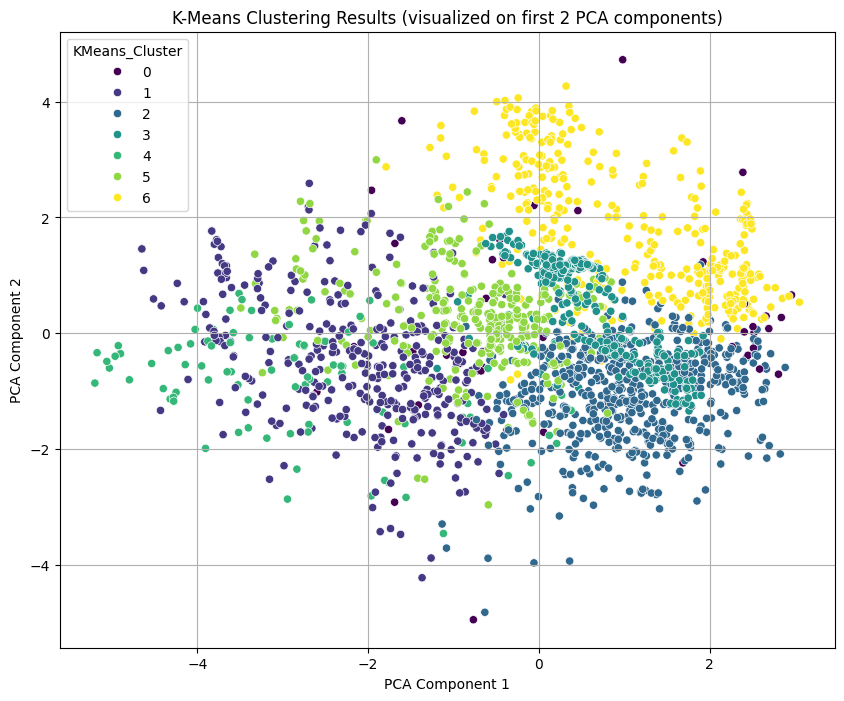

In [79]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_transformed_df)

# Add the PCA components and cluster labels to a new DataFrame for plotting
plot_df = pd.DataFrame(data=X_pca_2d, columns=['PCA Component 1', 'PCA Component 2'])
plot_df['KMeans_Cluster'] = X_with_clusters['KMeans_Cluster'] # Use the cluster labels from the previous K-Means step

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=plot_df, x='PCA Component 1', y='PCA Component 2', hue='KMeans_Cluster', palette='viridis', legend='full')
plt.title('K-Means Clustering Results (visualized on first 2 PCA components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

#### Evaluate Clustering Results

Evaluate the clustering results by comparing the K-Means clusters with the original obesity levels.

Adjusted Rand Index (ARI): 0.2391
Mutual Information Score (MIS): 0.6078

Optimal mapping (Original Label Index -> KMeans Cluster Index):
Insufficient_Weight -> Cluster 1
Normal_Weight -> Cluster 0
Obesity_Type_I -> Cluster 5
Obesity_Type_II -> Cluster 2
Obesity_Type_III -> Cluster 3
Overweight_Level_I -> Cluster 4
Overweight_Level_II -> Cluster 6

Accuracy based on optimal mapping: 0.4074


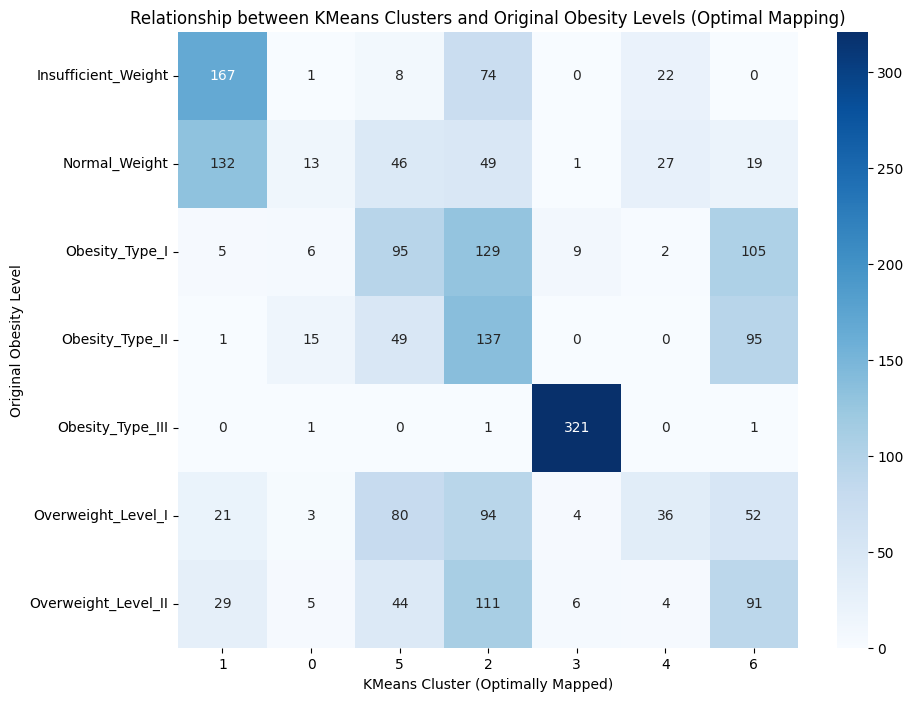

In [80]:
from sklearn.metrics import adjusted_rand_score, mutual_info_score
from scipy.optimize import linear_sum_assignment

# Evaluate clustering performance by comparing cluster labels with original obesity levels
original_labels = y['NObeyesdad']
cluster_labels = X_with_clusters['KMeans_Cluster']

# Calculate evaluation metrics
ari = adjusted_rand_score(original_labels, cluster_labels)
mis = mutual_info_score(original_labels, cluster_labels)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Mutual Information Score (MIS): {mis:.4f}")

# Create the confusion matrix
confusion_matrix_df = pd.crosstab(original_labels, cluster_labels, rownames=['Original Obesity Level'], colnames=['KMeans Cluster'])

# Use the Hungarian algorithm to find the optimal mapping
# The linear_sum_assignment finds the minimum cost, so we use the negative of the confusion matrix
cost_matrix = -confusion_matrix_df.values

row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Calculate the total number of correctly assigned instances
correct_assignments = -cost_matrix[row_ind, col_ind].sum()

# Calculate the total number of instances
total_instances = confusion_matrix_df.values.sum()

# Calculate the accuracy
accuracy = correct_assignments / total_instances

print(f"\nOptimal mapping (Original Label Index -> KMeans Cluster Index):")
for i, original_index in enumerate(row_ind):
    print(f"{confusion_matrix_df.index[original_index]} -> Cluster {confusion_matrix_df.columns[col_ind[i]]}")

print(f"\nAccuracy based on optimal mapping: {accuracy:.4f}")

# Reorder the columns of the confusion matrix based on the optimal mapping
optimal_cluster_order = confusion_matrix_df.columns[col_ind]
confusion_matrix_ordered = confusion_matrix_df[optimal_cluster_order]

# Visualize the relationship between clusters and original labels with ordered columns
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_ordered, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between KMeans Clusters and Original Obesity Levels (Optimal Mapping)')
plt.xlabel('KMeans Cluster (Optimally Mapped)')
plt.ylabel('Original Obesity Level')
plt.show()

### Hierarchical Clustering


In [81]:
from sklearn.cluster import AgglomerativeClustering
# Choose the number of clusters
n_clusters_hierarchical = 7 # Using k=7 for comparison with K-Means

# Apply Hierarchical Clustering (Agglomerative Clustering)
hierarchical = AgglomerativeClustering(n_clusters=n_clusters_hierarchical)
hierarchical.fit(X_transformed_df)
hierarchical_cluster_labels = hierarchical.labels_

# Add cluster labels to the original DataFrame
X_with_hierarchical_clusters = X.copy()
X_with_hierarchical_clusters['Hierarchical_Cluster'] = hierarchical_cluster_labels

display(X_with_hierarchical_clusters.head())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Hierarchical_Cluster
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,6
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,5
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,6
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,6
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,6


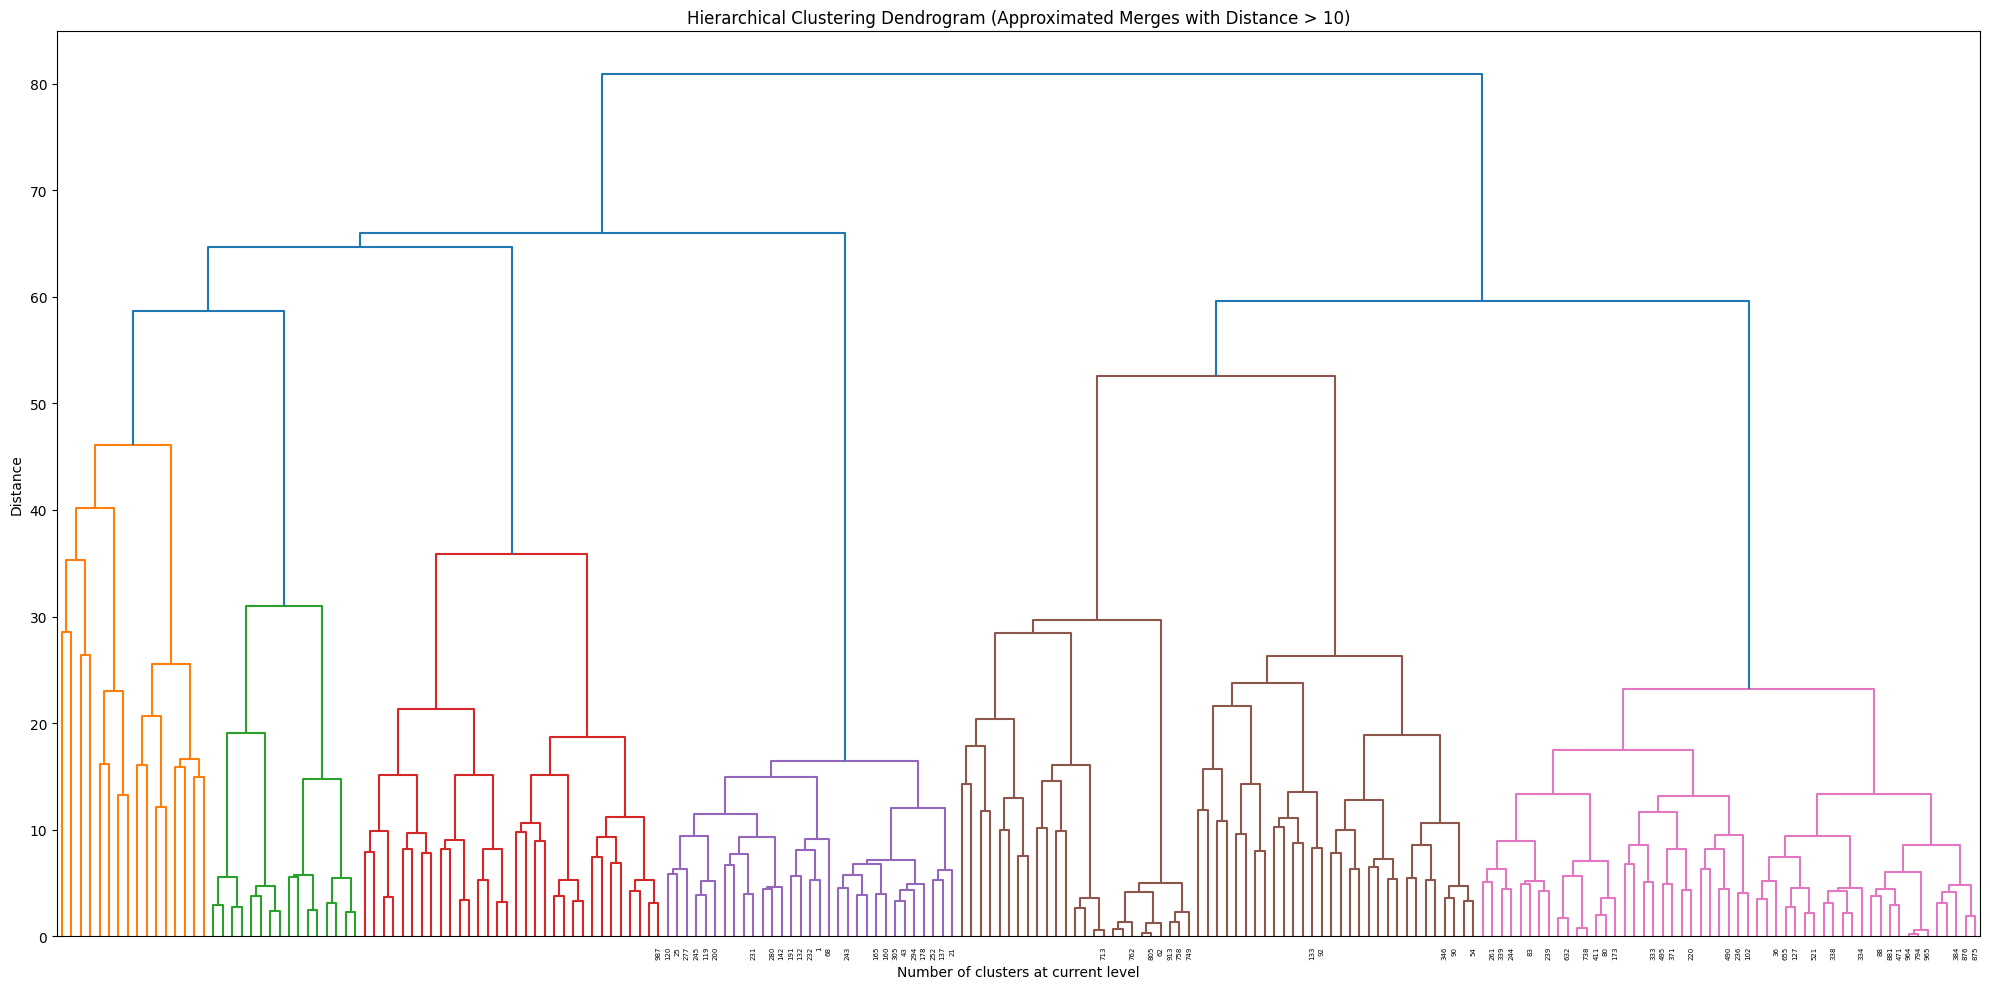

In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Generate the linkage matrix
# 'ward' linkage minimizes the variance of the clusters being merged.
linked = linkage(X_transformed_df, method='ward')

# Plot the dendrogram, showing only merges with distance > 10 (approximated by limiting levels)
plt.figure(figsize=(20, 10))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=False,
            truncate_mode='level', # Truncate the dendrogram to a certain level
            p=7)
plt.title('Hierarchical Clustering Dendrogram (Approximated Merges with Distance > 10)')
plt.xlabel('Number of clusters at current level')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

#### Evaluate Hierarchical Clustering Results

Evaluate the Hierarchical Clustering results by comparing the Hierarchical clusters with the original obesity levels.

Hierarchical Clustering Adjusted Rand Index (ARI): 0.2004
Hierarchical Clustering Mutual Information Score (MIS): 0.6067

Optimal mapping (Original Label Index -> Hierarchical Cluster Index):
Insufficient_Weight -> Cluster 3
Normal_Weight -> Cluster 5
Obesity_Type_I -> Cluster 0
Obesity_Type_II -> Cluster 1
Obesity_Type_III -> Cluster 2
Overweight_Level_I -> Cluster 4
Overweight_Level_II -> Cluster 6

Accuracy based on optimal mapping: 0.3993


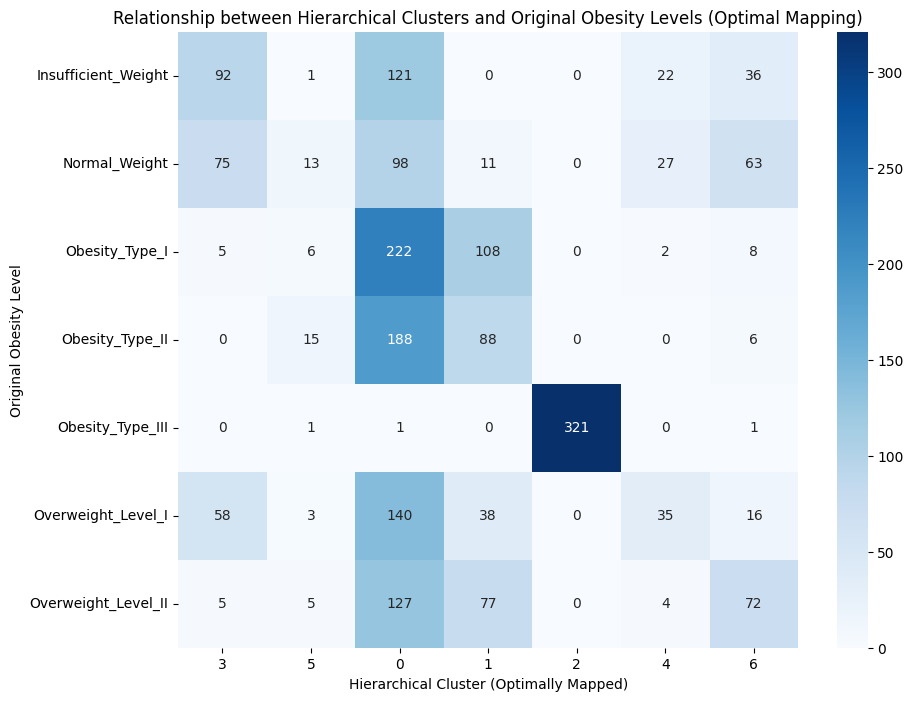

In [83]:
# Evaluate clustering performance by comparing cluster labels with original obesity levels
original_labels = y['NObeyesdad']
hierarchical_cluster_labels = X_with_hierarchical_clusters['Hierarchical_Cluster']

# Calculate evaluation metrics
ari_hierarchical = adjusted_rand_score(original_labels, hierarchical_cluster_labels)
mis_hierarchical = mutual_info_score(original_labels, hierarchical_cluster_labels)

print(f"Hierarchical Clustering Adjusted Rand Index (ARI): {ari_hierarchical:.4f}")
print(f"Hierarchical Clustering Mutual Information Score (MIS): {mis_hierarchical:.4f}")

# Create the confusion matrix
confusion_matrix_hierarchical_df = pd.crosstab(original_labels, hierarchical_cluster_labels, rownames=['Original Obesity Level'], colnames=['Hierarchical Cluster'])

# Use the Hungarian algorithm to find the optimal mapping
cost_matrix_hierarchical = -confusion_matrix_hierarchical_df.values

row_ind_hierarchical, col_ind_hierarchical = linear_sum_assignment(cost_matrix_hierarchical)

# Calculate the total number of correctly assigned instances
correct_assignments_hierarchical = -cost_matrix_hierarchical[row_ind_hierarchical, col_ind_hierarchical].sum()

# Calculate the total number of instances
total_instances = confusion_matrix_hierarchical_df.values.sum()

# Calculate the accuracy
accuracy_hierarchical = correct_assignments_hierarchical / total_instances

print(f"\nOptimal mapping (Original Label Index -> Hierarchical Cluster Index):")
for i, original_index in enumerate(row_ind_hierarchical):
    print(f"{confusion_matrix_hierarchical_df.index[original_index]} -> Cluster {confusion_matrix_hierarchical_df.columns[col_ind_hierarchical[i]]}")

print(f"\nAccuracy based on optimal mapping: {accuracy_hierarchical:.4f}")

# Reorder the columns of the confusion matrix based on the optimal mapping
optimal_cluster_order_hierarchical = confusion_matrix_hierarchical_df.columns[col_ind_hierarchical]
confusion_matrix_hierarchical_ordered = confusion_matrix_hierarchical_df[optimal_cluster_order_hierarchical]


# Visualize the relationship between clusters and original labels with ordered columns
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_hierarchical_ordered, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Hierarchical Clusters and Original Obesity Levels (Optimal Mapping)')
plt.xlabel('Hierarchical Cluster (Optimally Mapped)')
plt.ylabel('Original Obesity Level')
plt.show()

### EM
Expectation-Maximization (EM) algorithm for clustering using a Gaussian Mixture Model

In [84]:
from sklearn.mixture import GaussianMixture

# Apply EM (Gaussian Mixture Model)
# Choose the number of components
n_components_em = 7 # Using 7 components for comparison with K-Means and Hierarchical Clustering

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components_em, random_state=42)
gmm.fit(X_transformed_df)
em_cluster_labels = gmm.predict(X_transformed_df) # Get the cluster assignments

# Add cluster labels to the original DataFrame
X_with_em_clusters = X.copy()
X_with_em_clusters['EM_Cluster'] = em_cluster_labels

display(X_with_em_clusters.head())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,EM_Cluster
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,5
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,5
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,5
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,5
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,5


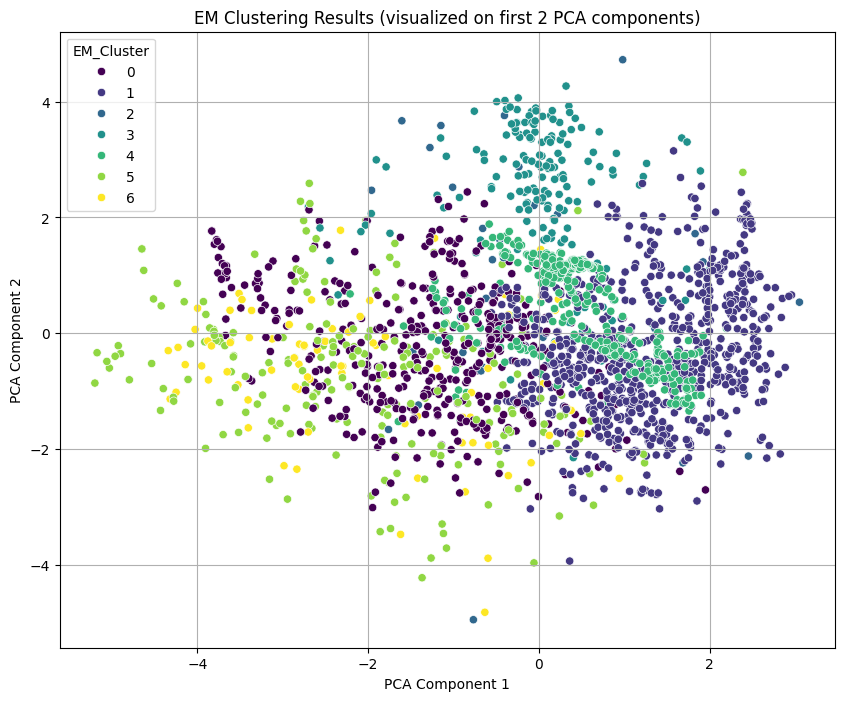

In [85]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_transformed_df)

# Add the PCA components and EM cluster labels to a new DataFrame for plotting
plot_df_em = pd.DataFrame(data=X_pca_2d, columns=['PCA Component 1', 'PCA Component 2'])
plot_df_em['EM_Cluster'] = X_with_em_clusters['EM_Cluster'] # Use the cluster labels from the previous EM step

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=plot_df_em, x='PCA Component 1', y='PCA Component 2', hue='EM_Cluster', palette='viridis', legend='full')
plt.title('EM Clustering Results (visualized on first 2 PCA components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

#### Evaluate EM Clustering Results

Evaluate the EM clustering results by comparing the EM clusters with the original obesity levels.

EM Clustering Adjusted Rand Index (ARI): 0.2446
EM Clustering Mutual Information Score (MIS): 0.5885

Optimal mapping (Original Label Index -> EM Cluster Index):
Insufficient_Weight -> Cluster 0
Normal_Weight -> Cluster 5
Obesity_Type_I -> Cluster 3
Obesity_Type_II -> Cluster 1
Obesity_Type_III -> Cluster 4
Overweight_Level_I -> Cluster 6
Overweight_Level_II -> Cluster 2

Accuracy based on optimal mapping: 0.4349


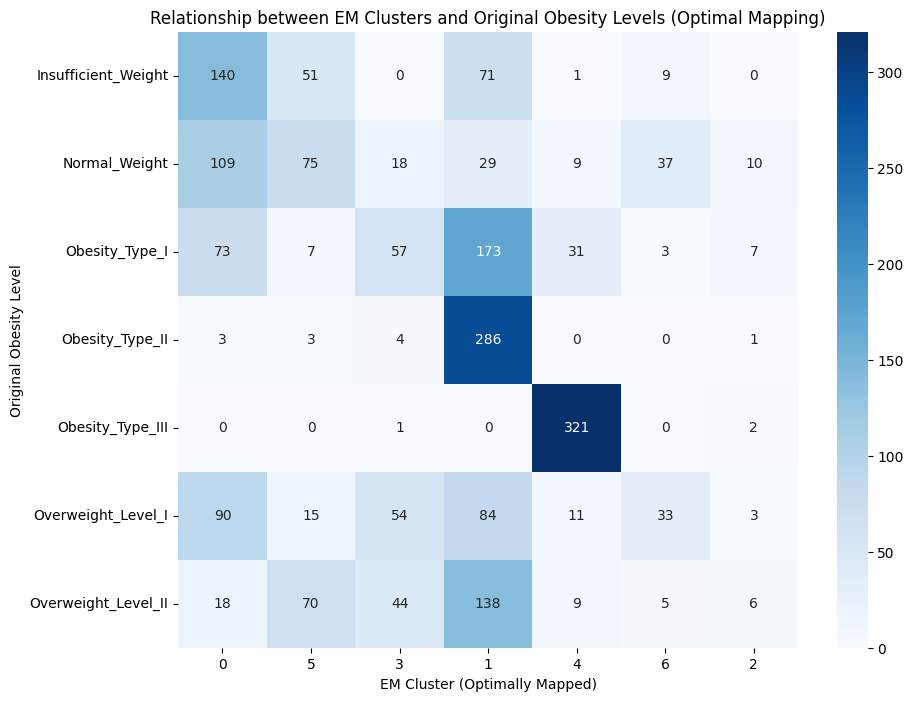

In [86]:
# Evaluate clustering performance by comparing cluster labels with original obesity levels
original_labels = y['NObeyesdad']
em_cluster_labels = X_with_em_clusters['EM_Cluster']

# Calculate evaluation metrics
ari_em = adjusted_rand_score(original_labels, em_cluster_labels)
mis_em = mutual_info_score(original_labels, em_cluster_labels)

print(f"EM Clustering Adjusted Rand Index (ARI): {ari_em:.4f}")
print(f"EM Clustering Mutual Information Score (MIS): {mis_em:.4f}")

# Create the confusion matrix
confusion_matrix_em_df = pd.crosstab(original_labels, em_cluster_labels, rownames=['Original Obesity Level'], colnames=['EM Cluster'])

# Use the Hungarian algorithm to find the optimal mapping
cost_matrix_em = -confusion_matrix_em_df.values

row_ind_em, col_ind_em = linear_sum_assignment(cost_matrix_em)

# Calculate the total number of correctly assigned instances
correct_assignments_em = -cost_matrix_em[row_ind_em, col_ind_em].sum()

# Calculate the total number of instances
total_instances = confusion_matrix_em_df.values.sum()

# Calculate the accuracy
accuracy_em = correct_assignments_em / total_instances

print(f"\nOptimal mapping (Original Label Index -> EM Cluster Index):")
for i, original_index in enumerate(row_ind_em):
    print(f"{confusion_matrix_em_df.index[original_index]} -> Cluster {confusion_matrix_em_df.columns[col_ind_em[i]]}")

print(f"\nAccuracy based on optimal mapping: {accuracy_em:.4f}")

# Reorder the columns of the confusion matrix based on the optimal mapping
optimal_cluster_order_em = confusion_matrix_em_df.columns[col_ind_em]
confusion_matrix_em_ordered = confusion_matrix_em_df[optimal_cluster_order_em]

# Visualize the relationship between clusters and original labels with ordered columns
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_em_ordered, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between EM Clusters and Original Obesity Levels (Optimal Mapping)')
plt.xlabel('EM Cluster (Optimally Mapped)')
plt.ylabel('Original Obesity Level')
plt.show()

## Result and Analysis


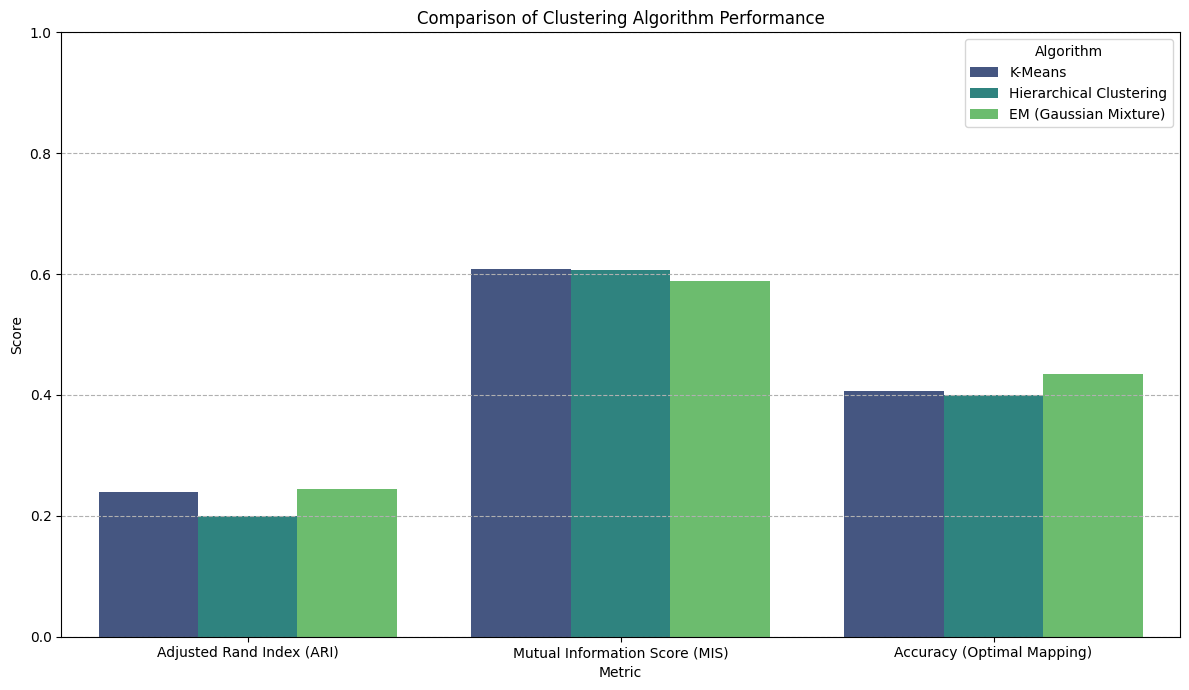

In [87]:
# Create a DataFrame to hold the evaluation metrics for each algorithm
evaluation_data = {
    'Algorithm': ['K-Means', 'Hierarchical Clustering', 'EM (Gaussian Mixture)'],
    'Adjusted Rand Index (ARI)': [ari, ari_hierarchical, ari_em],
    'Mutual Information Score (MIS)': [mis, mis_hierarchical, mis_em],
    'Accuracy (Optimal Mapping)': [accuracy, accuracy_hierarchical, accuracy_em]
}
evaluation_df = pd.DataFrame(evaluation_data)

evaluation_melted = evaluation_df.melt(id_vars='Algorithm', var_name='Metric', value_name='Score')

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(data=evaluation_melted, x='Metric', y='Score', hue='Algorithm', palette='viridis')
plt.title('Comparison of Clustering Algorithm Performance')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Comparison of Clustering Algorithms

Based on histgram above:

*   **Best Performance:** The **EM (Gaussian Mixture) algorithm** appears to have performed slightly better in aligning the clusters with the original obesity levels, as indicated by the highest Accuracy based on optimal mapping , and a slightly higher Adjusted Rand Index compared to K-Means and Hierarchical Clustering.
*   **K-Means vs. Hierarchical Clustering:** K-Means's accuracy performed slightly better than Hierarchical Clustering in this case.

**Potential Reasons for Differences in Performance:**

*   **Assumptions of the Algorithms:**
    *   **K-Means** assumes spherical clusters of roughly equal size and density.
    *   **Hierarchical Clustering** (with Ward linkage) also tends to perform well with spherical clusters but can capture more complex structures depending on the linkage method.
    *   **EM (Gaussian Mixture)** assumes that the data is generated from a mixture of Gaussian distributions. This allows it to model clusters with different sizes, shapes, and orientations, which might be a better fit for the underlying structure of the obesity level data compared to the spherical assumptions of K-Means.
*   **Nature of the Data:** The distribution and relationships between the features and the actual obesity levels might better align with the probabilistic model assumed by EM compared to the distance-based partitioning of K-Means and Hierarchical Clustering.
*   **Choice of Parameters:** For all algorithms, the choice of parameters (especially the number of clusters, which was set to 7 for comparison) significantly impacts the results. The "optimal" number of clusters suggested by methods like the silhouette score (which suggested k=2) differed from the 7 predefined obesity levels. This suggests that the data's inherent clustering structure might not perfectly align with the 7 distinct obesity categories.
*   **Sensitivity to Outliers and Noise:** While preprocessing steps like scaling were applied, the different algorithms have varying sensitivities to outliers and noise, which could influence their performance.

**Confusion Matrices:**

In conclusion, while none of the unsupervised clustering algorithms perfectly replicated the predefined 7 obesity levels (as indicated by ARI and accuracy scores below 1), the EM algorithm showed a slight advantage in aligning with these labels, possibly due to its ability to model more flexible cluster shapes.

### Comparison with Supervised Model
Here I use Catboost to compare its performance with unsupervised result. Catboost performance by accuracy is much better than the unsupervised version as expected.

CatBoost Classifier Accuracy: 0.9504


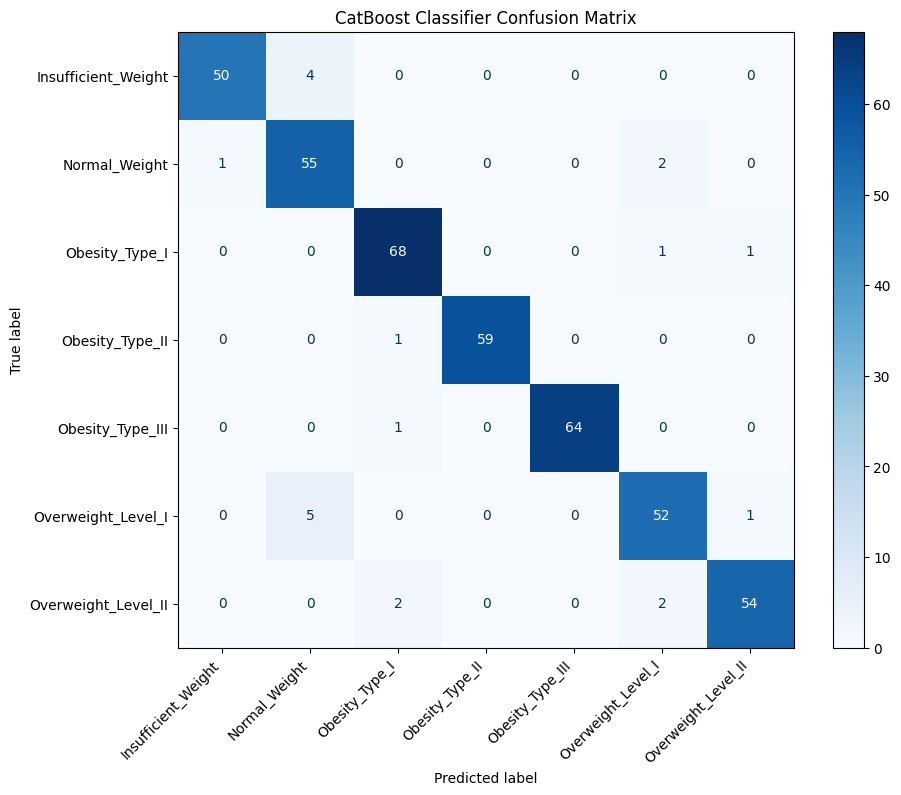

In [88]:
!pip install catboost -q
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Prepare the data for CatBoost
# Use the transformed data X_transformed_df and the original target labels y
X_catboost = X_transformed_df
y_catboost = y['NObeyesdad']

# Encode the target variable into numerical labels
label_encoder = LabelEncoder()
y_catboost_encoded = label_encoder.fit_transform(y_catboost)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_catboost, y_catboost_encoded, test_size=0.2, random_state=42, stratify=y_catboost_encoded) # Stratify using the encoded labels

# Initialize and train the CatBoost classifier
# You might want to tune the parameters of CatBoost for better performance
catboost_classifier = CatBoostClassifier(iterations=100,
                                        learning_rate=0.1,
                                        loss_function='MultiClass',
                                        verbose=0,
                                        random_state=42)
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_classifier.predict(X_test)

# CatBoost predictions are sometimes returned as a 2D array, flatten if necessary
if y_pred.ndim > 1:
    y_pred = y_pred.flatten()

# Calculate the accuracy
accuracy_catboost = accuracy_score(y_test, y_pred)
print(f"CatBoost Classifier Accuracy: {accuracy_catboost:.4f}")

# Calculate and plot the confusion matrix
# Use the original class names for display
cm = confusion_matrix(y_test, y_pred, labels=catboost_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='Blues', ax=ax)
plt.title('CatBoost Classifier Confusion Matrix')
# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

## Discussion and Conclusion


## Discussion and Conclusion

Based on the analysis, here's a summary of the findings:

### Learning and Takeaways:
*   Unsupervised clustering (K-Means, Hierarchical, EM) revealed some data structure but didn't perfectly align with the 7 predefined obesity levels. EM showed slightly better alignment (Accuracy \~43%) compared to K-Means (\~41%) and Hierarchical Clustering (\~40%).
*   A supervised CatBoost classifier achieved high accuracy  in predicting obesity levels, as expected, since it uses the labels for training.
*   Clustering can identify potential lifestyle groups, while supervised learning is better for predicting known categories.

### Challenges and What Didn't Work:
*   The optimal number of clusters from methods like the elbow method (k=7 suggested by plot) and silhouette score (k=2 suggested by plot) didn't clearly match the 7 predefined obesity levels, indicating the data's inherent structure might not perfectly support these 7 distinct clusters based on the given features.
*   Visualizing the dendrogram for a large number of data points was challenging.

### Suggestions for Improvement:
*   Further analyze the characteristics of the clusters found by EM.
*   Explore different preprocessing or feature engineering techniques.
*   Investigate other clustering algorithms or tune existing ones further.
*   Gather additional data that might better differentiate the obesity levels.

Github link: https://github.com/Marcusly17/cu_ml2_final/blob/main/CU_ML2_Final.ipynb